In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.12/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [51]:
# Load the dataset
data = pd.read_csv('/home/ichigo/Desktop/Medical diagnosis uisng AI/Diseases_dataset/diabetes.csv')

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Replace zeros in important columns with NaN
important_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[important_cols] = data[important_cols].replace(0, pd.NA)

# Fill missing values with the column mean
data.fillna(data.mean(), inplace=True)

# Split features and target
X = data.iloc[:, :-1]  # All columns except 'Outcome'
y = data['Outcome']  # Target column

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


/tmp/ipykernel_66177/2964993549.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(data.mean(), inplace=True)


In [53]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.75


In [41]:
# Check for missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Glucose_Insulin_Ratio       4
dtype: int64


In [42]:
# Summary statistics
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  \
count  768.000000                768.000000  768.000000  768.000000   
mean    31.992578                  0.471876   33.240885    0.348958   
std      7.884160                  0.331329   11.760232    0.476951   
min      0.000000              

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/lib/python3/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


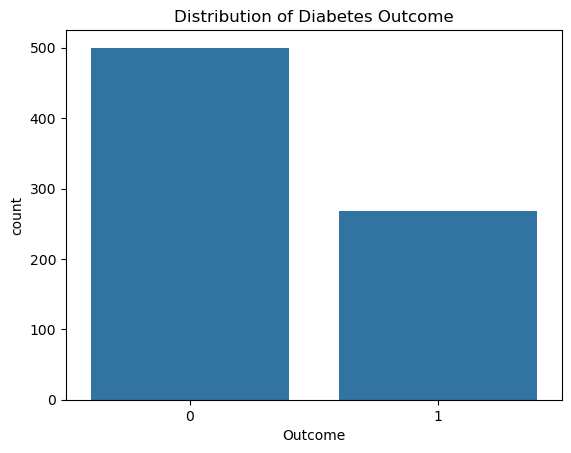

In [43]:
# Distribution of the target variable
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

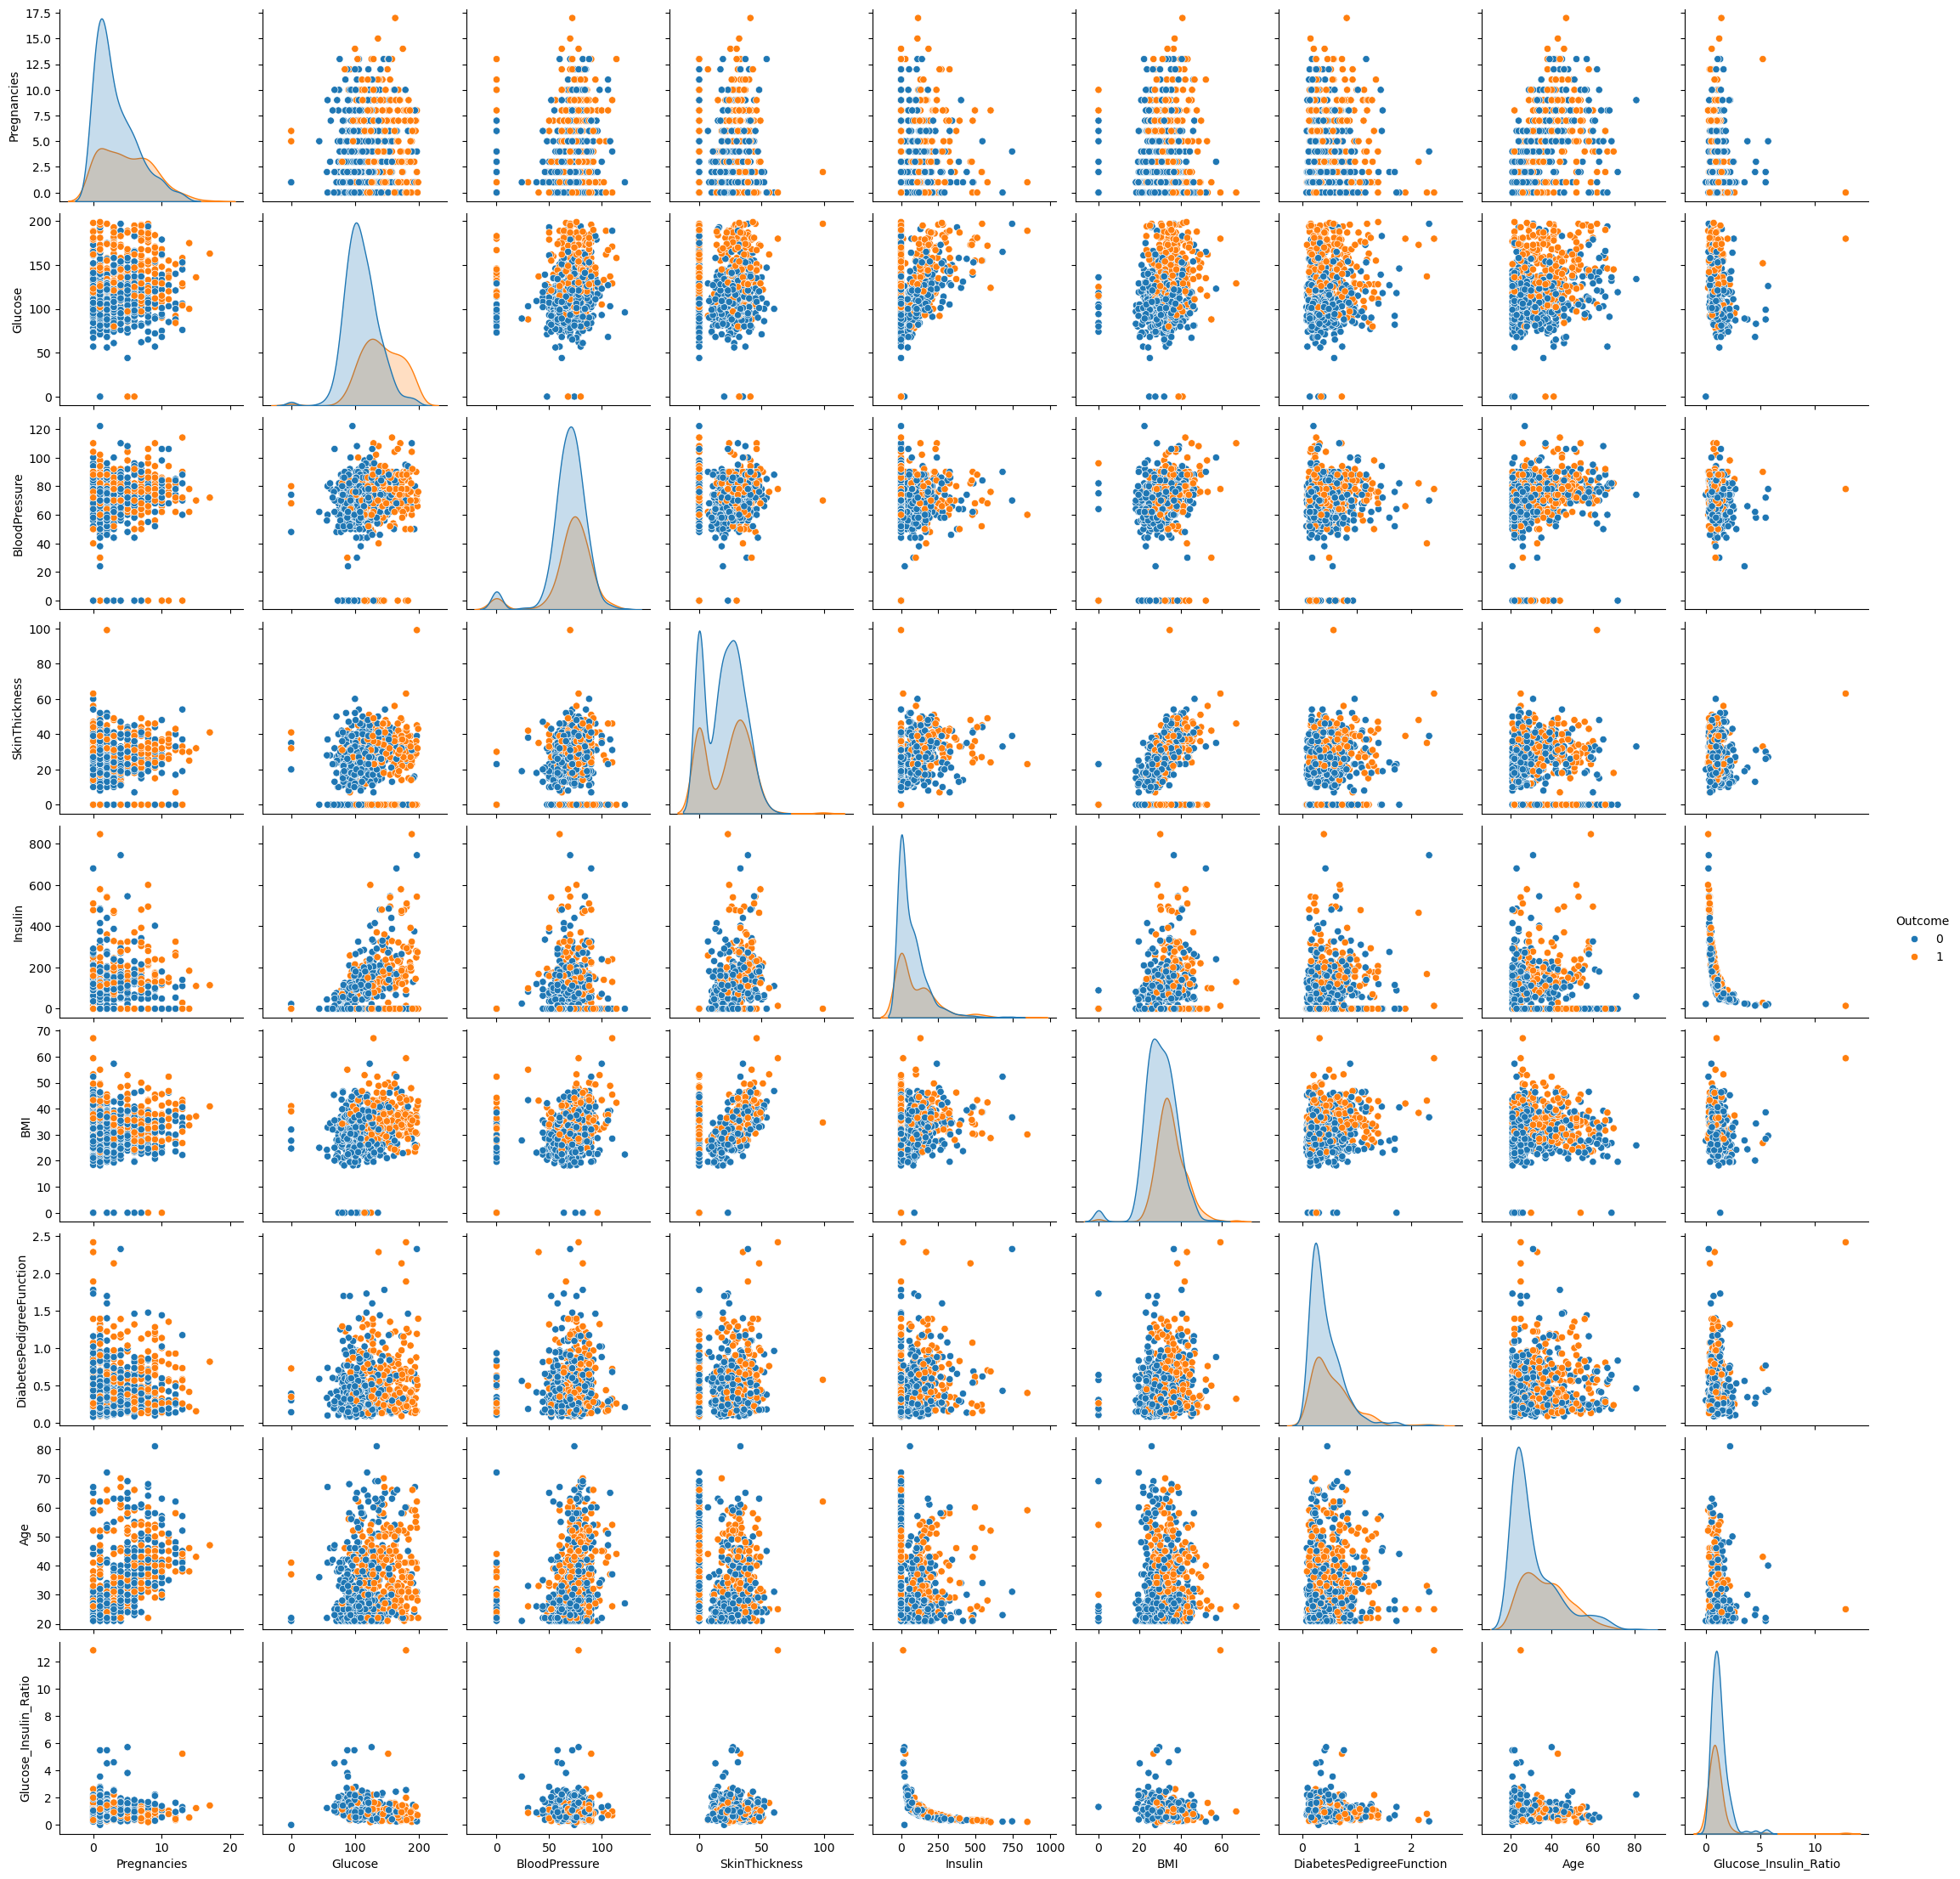

In [44]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Outcome')
plt.show()


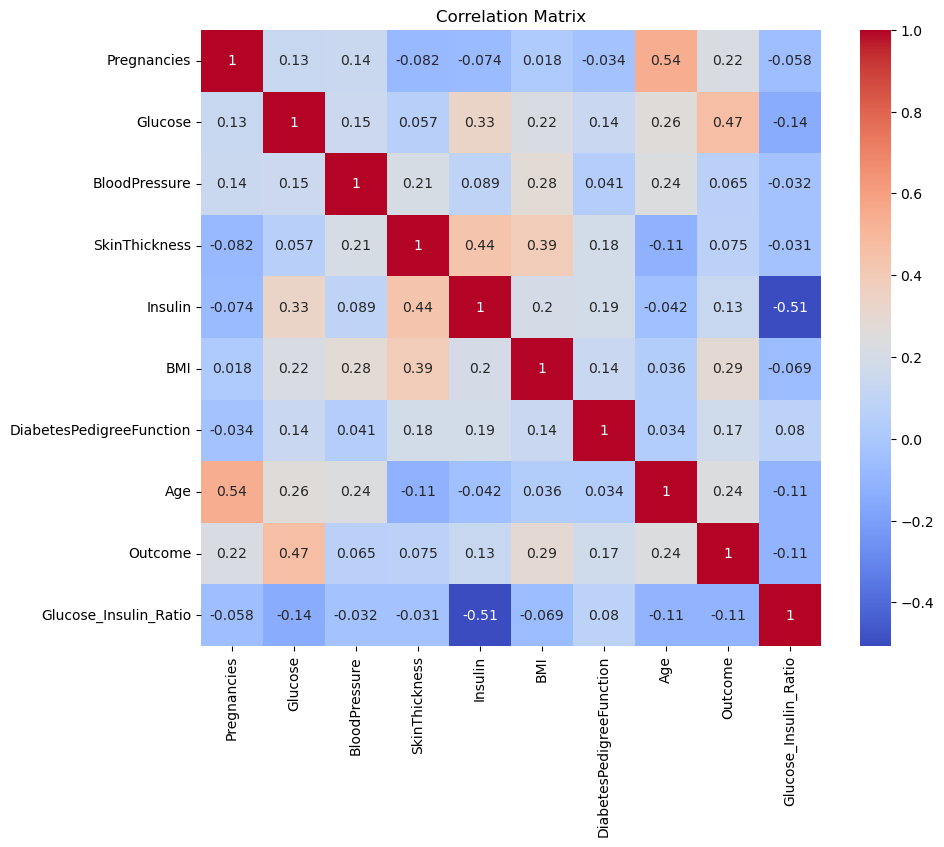

In [45]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [46]:
# Split the data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7532467532467533


In [ ]:
#Improve Accuracy with Feature Selection

from sklearn.feature_selection import SelectKBest, f_classif

# Select top 5 features
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X_scaled, y)

In [ ]:
# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')


In [ ]:
# Split the data with selected features
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
# Train Logistic Regression again
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Evaluate
y_pred = model.predict(X_test)
print("Accuracy (with feature selection):", accuracy_score(y_test, y_pred))

Accuracy (with feature selection): 0.7532467532467533
